In [1]:
import pandas as pd
import ast

# ARI

In [2]:
methods = ['MuCoST', 'GraphST','STAGATE','ConST','SpaceFlow','SpaGCN','Scanpy']
df_list = []
for i, t in enumerate(methods):
    dir = 'report/'+t+'-ari-results.txt'
    with open(dir, 'r') as file:
        content = file.read()
        my_dict = ast.literal_eval(content)
        df_i = pd.DataFrame(list(my_dict.items()), columns=['Section', t])
        df_i.set_index('Section', inplace=True)
        df_list.append(df_i)
df_merged = pd.concat(df_list, axis=1, )
df_merged

,MuCoST,GraphST,STAGATE,ConST,SpaceFlow,SpaGCN,Scanpy
Section,,,,,,,
151507,0.447848,0.396628,0.556088,0.413349,0.492009,0.370817,0.321163
151508,0.447214,0.436140,0.494592,0.264811,0.248881,0.332993,0.236071
151509,0.457872,0.474131,0.469570,0.486328,0.405621,0.368648,0.251901
151510,0.409498,0.431248,0.482222,0.278834,0.312810,0.370037,0.325073
151673,0.605415,0.616567,0.581939,0.491791,0.443282,0.402179,0.315806
151674,0.605157,0.554761,0.418604,0.524468,0.323744,0.301546,0.253781
151675,0.485713,0.545333,0.538623,0.534498,0.370473,0.274026,0.296665
151676,0.573125,0.545068,0.308959,0.506216,0.386691,0.366262,0.252797
151669,0.655486,0.448441,0.464715,0.348655,0.232245,0.195998,0.194200


<frozen importlib._bootstrap>:228: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject
/home/zhang/anaconda3/envs/pyg/lib/python3.9/site-packages/seaborn/categorical.py:166: FutureWarning: Setting a gradient palette using color= is deprecated and will be removed in version 0.13. Set `palette='dark:black'` for same effect.
  warnings.warn(msg, FutureWarning)


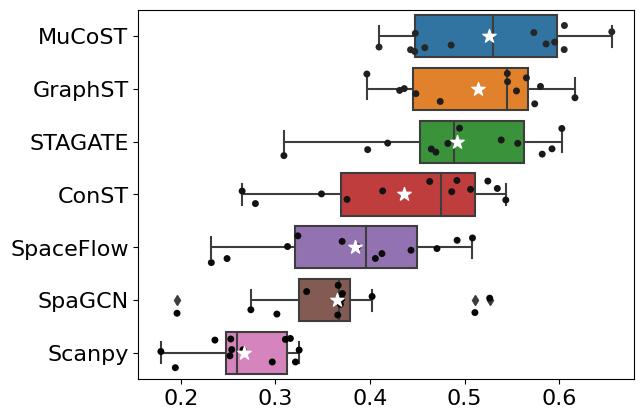

In [3]:
import matplotlib.pyplot as plt
import xlrd
import seaborn as sns
import matplotlib as mpl
colors = sns.color_palette(n_colors=7)
mpl.rcParams.update({'font.size': 16})
ax = sns.boxplot(data=df_merged, orient='h')
ax = sns.stripplot(data=df_merged,orient='h',color='black' ,jitter=0.3, size=5)
mean = df_merged.mean()
ax.set_ylabel('',rotation=0, labelpad=50, va='center')
for i, val in enumerate(mean):
    ax.scatter(val, i, color='white', s=100, marker='*',zorder=10, label=f'Mean {df_merged.columns[i]}')
plt.show()

In [4]:
# from scipy.stats import wilcoxon
# statistic, p_value = wilcoxon(df_merged['MuCoST_1'], df_merged['GraphST'], alternative='greater')
# print("Statistic:", statistic)
# print("P-value:", p_value)

In [5]:
df_merged.mean()

MuCoST       0.525935
GraphST      0.513976
STAGATE      0.492311
ConST        0.435931
SpaceFlow    0.383942
SpaGCN       0.365468
Scanpy       0.266891
dtype: float64

In [6]:
df_merged.median()

MuCoST       0.529419
GraphST      0.545200
STAGATE      0.488407
ConST        0.474689
SpaceFlow    0.396156
SpaGCN       0.367455
Scanpy       0.259769
dtype: float64

In [7]:
df_merged.max()

MuCoST       0.655486
GraphST      0.616567
STAGATE      0.602676
ConST        0.543475
SpaceFlow    0.508241
SpaGCN       0.526416
Scanpy       0.325073
dtype: float64

In [8]:
df_merged.min()

MuCoST       0.409498
GraphST      0.396628
STAGATE      0.308959
ConST        0.264811
SpaceFlow    0.232245
SpaGCN       0.195998
Scanpy       0.178951
dtype: float64

In [9]:
df_merged.quantile(0.75)

MuCoST       0.597568
GraphST      0.567443
STAGATE      0.562551
ConST        0.510779
SpaceFlow    0.450141
SpaGCN       0.378657
Scanpy       0.311846
Name: 0.75, dtype: float64

In [10]:
df_merged.quantile(0.25)

MuCoST       0.447689
GraphST      0.445366
STAGATE      0.453187
ConST        0.368939
SpaceFlow    0.321010
SpaGCN       0.325132
Scanpy       0.247943
Name: 0.25, dtype: float64

# NMI

In [11]:
methods = ['MuCoST', 'STAGATE','GraphST','ConST','SpaceFlow','SpaGCN','Scanpy']
df_list = []
for i, t in enumerate(methods):
    dir = 'report/'+t+'-nmi-results.txt'
    with open(dir, 'r') as file:
        content = file.read()
        my_dict = ast.literal_eval(content)
        df_i = pd.DataFrame(list(my_dict.items()), columns=['Section', t])
        df_i.set_index('Section', inplace=True)
        df_list.append(df_i)
df_merged = pd.concat(df_list, axis=1, )
df_merged

,MuCoST,STAGATE,GraphST,ConST,SpaceFlow,SpaGCN,Scanpy
Section,,,,,,,
151507,0.604879,0.697965,0.597526,0.568691,0.605765,0.484767,0.402589
151508,0.621131,0.624258,0.578560,0.409341,0.341668,0.434868,0.379196
151509,0.621325,0.649926,0.628974,0.625397,0.494868,0.548615,0.404546
151510,0.576870,0.644914,0.590956,0.433966,0.460271,0.433196,0.396341
151673,0.718030,0.714756,0.693107,0.634108,0.568942,0.522424,0.469395
151674,0.715090,0.545841,0.672381,0.670171,0.447417,0.455118,0.421851
151675,0.609781,0.649696,0.638987,0.673546,0.489989,0.418241,0.406182
151676,0.671985,0.473774,0.637208,0.652051,0.511448,0.501818,0.383994
151669,0.651383,0.608168,0.545045,0.519311,0.452455,0.323884,0.361882


/home/zhang/anaconda3/envs/pyg/lib/python3.9/site-packages/seaborn/categorical.py:166: FutureWarning: Setting a gradient palette using color= is deprecated and will be removed in version 0.13. Set `palette='dark:black'` for same effect.
  warnings.warn(msg, FutureWarning)


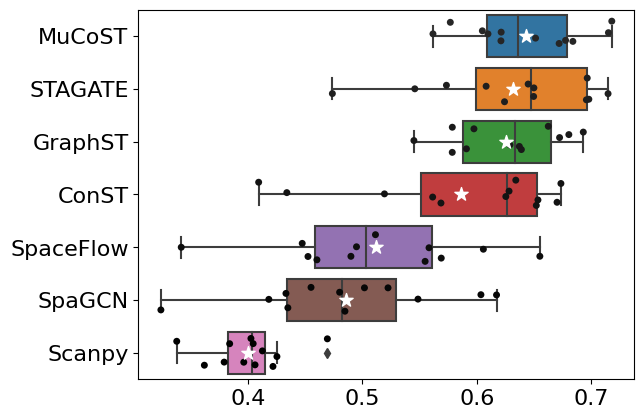

In [12]:
import matplotlib.pyplot as plt
import xlrd
import seaborn as sns
import matplotlib as mpl
colors = sns.color_palette(n_colors=7)
mpl.rcParams.update({'font.size': 16})
ax = sns.boxplot(data=df_merged, orient='h')
ax = sns.stripplot(data=df_merged,orient='h',color='black' ,jitter=0.3, size=5)
mean = df_merged.mean()
ax.set_ylabel('',rotation=0, labelpad=50, va='center')
for i, val in enumerate(mean):
    ax.scatter(val, i, color='white', s=100, marker='*',zorder=10, label=f'Mean {df_merged.columns[i]}')
plt.show()

# HS

In [13]:
methods = ['MuCoST', 'STAGATE','GraphST','ConST','SpaceFlow','SpaGCN','Scanpy']
df_list = []
for i, t in enumerate(methods):
    dir = 'report/'+t+'-hs-results.txt'
    with open(dir, 'r') as file:
        content = file.read()
        my_dict = ast.literal_eval(content)
        df_i = pd.DataFrame(list(my_dict.items()), columns=['Section', t])
        df_i.set_index('Section', inplace=True)
        df_list.append(df_i)
df_merged = pd.concat(df_list, axis=1, )
df_merged

,MuCoST,STAGATE,GraphST,ConST,SpaceFlow,SpaGCN,Scanpy
Section,,,,,,,
151507,0.572904,0.688386,0.567782,0.574256,0.618242,0.484664,0.435785
151508,0.613311,0.632899,0.581407,0.410423,0.349802,0.444229,0.402726
151509,0.624573,0.674958,0.650407,0.659308,0.517822,0.582678,0.452400
151510,0.604032,0.685866,0.626887,0.439793,0.491938,0.433430,0.424511
151673,0.736454,0.734374,0.687930,0.609492,0.576554,0.529585,0.531598
151674,0.724731,0.556965,0.683359,0.674685,0.450433,0.460963,0.483766
151675,0.604258,0.658438,0.619448,0.678607,0.481052,0.421263,0.433594
151676,0.683094,0.478401,0.642510,0.648959,0.508972,0.511605,0.411487
151669,0.629114,0.663171,0.577860,0.527516,0.515774,0.359547,0.503700


/home/zhang/anaconda3/envs/pyg/lib/python3.9/site-packages/seaborn/categorical.py:166: FutureWarning: Setting a gradient palette using color= is deprecated and will be removed in version 0.13. Set `palette='dark:black'` for same effect.
  warnings.warn(msg, FutureWarning)


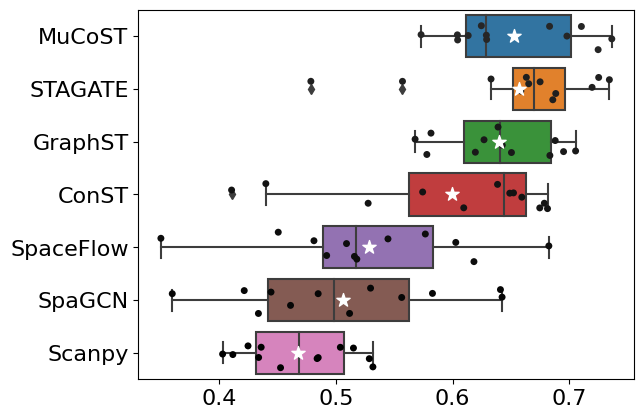

In [14]:
import matplotlib.pyplot as plt
import xlrd
import seaborn as sns
import matplotlib as mpl
colors = sns.color_palette(n_colors=7)
mpl.rcParams.update({'font.size': 16})
ax = sns.boxplot(data=df_merged, orient='h')
ax = sns.stripplot(data=df_merged,orient='h',color='black' ,jitter=0.3, size=5)
mean = df_merged.mean()
ax.set_ylabel('',rotation=0, labelpad=50, va='center')
for i, val in enumerate(mean):
    ax.scatter(val, i, color='white', s=100, marker='*',zorder=10, label=f'Mean {df_merged.columns[i]}')
plt.show()

# CS

In [15]:
methods = ['MuCoST', 'STAGATE','GraphST','ConST','SpaceFlow','SpaGCN','Scanpy']
df_list = []
for i, t in enumerate(methods):
    dir = 'report/'+t+'-cs-results.txt'
    with open(dir, 'r') as file:
        content = file.read()
        my_dict = ast.literal_eval(content)
        df_i = pd.DataFrame(list(my_dict.items()), columns=['Section', t])
        df_i.set_index('Section', inplace=True)
        df_list.append(df_i)
df_merged = pd.concat(df_list, axis=1, )
df_merged

,MuCoST,STAGATE,GraphST,ConST,SpaceFlow,SpaGCN,Scanpy
Section,,,,,,,
151507,0.640634,0.707815,0.630560,0.563234,0.593782,0.484871,0.374092
151508,0.629153,0.615849,0.575741,0.408264,0.333904,0.425893,0.358263
151509,0.618111,0.626684,0.608909,0.594804,0.473864,0.518315,0.365848
151510,0.552047,0.608577,0.558921,0.428291,0.432435,0.432963,0.371677
151673,0.700505,0.696159,0.698363,0.660796,0.561528,0.515454,0.420223
151674,0.705702,0.535153,0.661750,0.665717,0.444440,0.449419,0.373986
151675,0.615405,0.641184,0.659797,0.668560,0.499264,0.415262,0.382029
151676,0.661231,0.469235,0.631992,0.655172,0.513948,0.492398,0.359944
151669,0.675286,0.561591,0.515757,0.511357,0.402983,0.294658,0.282377


/home/zhang/anaconda3/envs/pyg/lib/python3.9/site-packages/seaborn/categorical.py:166: FutureWarning: Setting a gradient palette using color= is deprecated and will be removed in version 0.13. Set `palette='dark:black'` for same effect.
  warnings.warn(msg, FutureWarning)


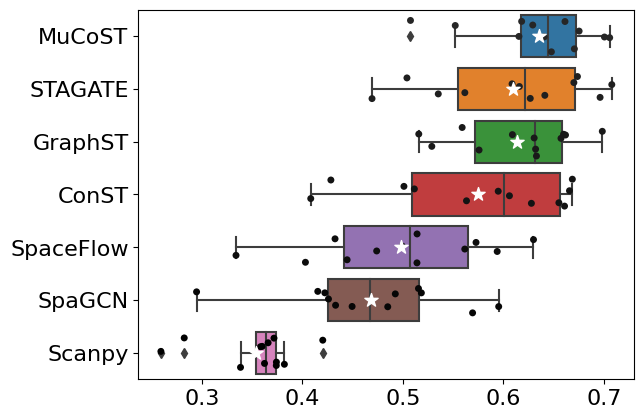

In [16]:
import matplotlib.pyplot as plt
import xlrd
import seaborn as sns
import matplotlib as mpl
colors = sns.color_palette(n_colors=7)
mpl.rcParams.update({'font.size': 16})
ax = sns.boxplot(data=df_merged, orient='h')
ax = sns.stripplot(data=df_merged,orient='h',color='black' ,jitter=0.3, size=5)
mean = df_merged.mean()
ax.set_ylabel('',rotation=0, labelpad=50, va='center')
for i, val in enumerate(mean):
    ax.scatter(val, i, color='white', s=100, marker='*',zorder=10, label=f'Mean {df_merged.columns[i]}')
plt.show()

# V05

In [17]:
methods = ['MuCoST', 'STAGATE','GraphST','ConST','SpaceFlow','SpaGCN','Scanpy']
df_list = []
for i, t in enumerate(methods):
    dir = 'report/'+t+'-v05-results.txt'
    with open(dir, 'r') as file:
        content = file.read()
        my_dict = ast.literal_eval(content)
        df_i = pd.DataFrame(list(my_dict.items()), columns=['Section', t])
        df_i.set_index('Section', inplace=True)
        df_list.append(df_i)
df_merged = pd.concat(df_list, axis=1, )
df_merged

,MuCoST,STAGATE,GraphST,ConST,SpaceFlow,SpaGCN,Scanpy
Section,,,,,,,
151507,0.593831,0.694743,0.587271,0.570534,0.609868,0.484733,0.413078
151508,0.618502,0.627112,0.579506,0.409701,0.344337,0.437944,0.386728
151509,0.622404,0.658061,0.635960,0.636306,0.502290,0.559518,0.419332
151510,0.585649,0.658010,0.602467,0.435891,0.470364,0.433274,0.405306
151673,0.724068,0.721178,0.691373,0.625684,0.571457,0.524789,0.488446
151674,0.718275,0.549499,0.676001,0.671669,0.448418,0.457049,0.440650
151675,0.607929,0.652584,0.632338,0.675224,0.486973,0.419243,0.414926
151676,0.675647,0.475306,0.638965,0.651017,0.510620,0.505039,0.392741
151669,0.643786,0.625460,0.555561,0.522018,0.471760,0.334959,0.399362


/home/zhang/anaconda3/envs/pyg/lib/python3.9/site-packages/seaborn/categorical.py:166: FutureWarning: Setting a gradient palette using color= is deprecated and will be removed in version 0.13. Set `palette='dark:black'` for same effect.
  warnings.warn(msg, FutureWarning)


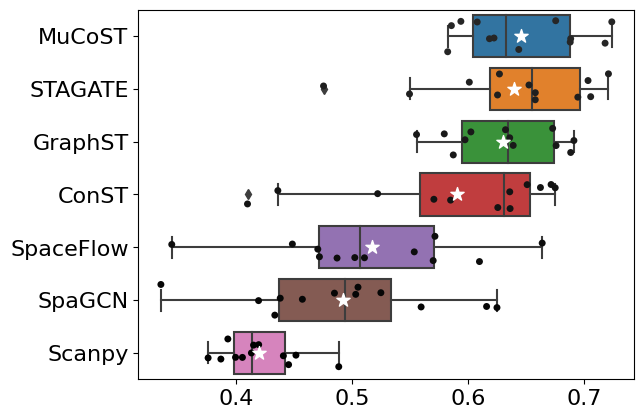

In [18]:
import matplotlib.pyplot as plt
import xlrd
import seaborn as sns
import matplotlib as mpl
colors = sns.color_palette(n_colors=7)
mpl.rcParams.update({'font.size': 16})
ax = sns.boxplot(data=df_merged, orient='h')
ax = sns.stripplot(data=df_merged,orient='h',color='black' ,jitter=0.3, size=5)
mean = df_merged.mean()
ax.set_ylabel('',rotation=0, labelpad=50, va='center')
for i, val in enumerate(mean):
    ax.scatter(val, i, color='white', s=100, marker='*',zorder=10, label=f'Mean {df_merged.columns[i]}')
plt.show()

# V15

In [19]:
methods = ['MuCoST', 'STAGATE','GraphST','ConST','SpaceFlow','SpaGCN','Scanpy']
df_list = []
for i, t in enumerate(methods):
    dir = 'report/'+t+'-v15-results.txt'
    with open(dir, 'r') as file:
        content = file.read()
        my_dict = ast.literal_eval(content)
        df_i = pd.DataFrame(list(my_dict.items()), columns=['Section', t])
        df_i.set_index('Section', inplace=True)
        df_list.append(df_i)
df_merged = pd.concat(df_list, axis=1, )
df_merged

,MuCoST,STAGATE,GraphST,ConST,SpaceFlow,SpaGCN,Scanpy
Section,,,,,,,
151507,0.611707,0.699913,0.603853,0.567591,0.603330,0.484788,0.396547
151508,0.622719,0.622558,0.577994,0.409125,0.340087,0.433043,0.374816
151509,0.620680,0.645141,0.624856,0.619029,0.490520,0.542275,0.396165
151510,0.571729,0.637304,0.584259,0.432819,0.454421,0.433150,0.391150
151673,0.714455,0.710958,0.694152,0.639272,0.567443,0.521015,0.458661
151674,0.713192,0.543669,0.670227,0.669275,0.446818,0.453966,0.411322
151675,0.610897,0.647976,0.643043,0.672543,0.491816,0.417642,0.401110
151676,0.669806,0.472859,0.636158,0.652673,0.511946,0.499905,0.378930
151669,0.656027,0.598245,0.538924,0.517700,0.441613,0.317584,0.342590


/home/zhang/anaconda3/envs/pyg/lib/python3.9/site-packages/seaborn/categorical.py:166: FutureWarning: Setting a gradient palette using color= is deprecated and will be removed in version 0.13. Set `palette='dark:black'` for same effect.
  warnings.warn(msg, FutureWarning)


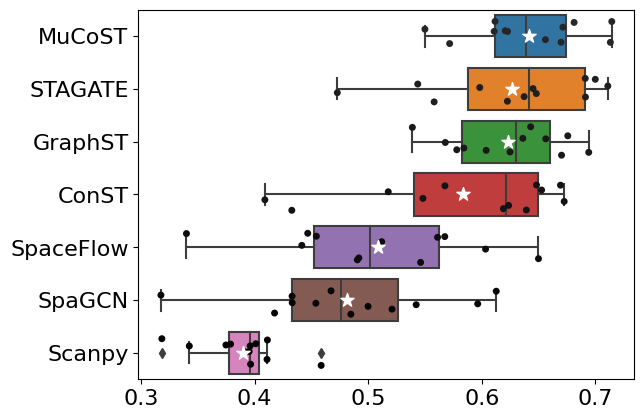

In [20]:
import matplotlib.pyplot as plt
import xlrd
import seaborn as sns
import matplotlib as mpl
colors = sns.color_palette(n_colors=7)
mpl.rcParams.update({'font.size': 16})
ax = sns.boxplot(data=df_merged, orient='h')
ax = sns.stripplot(data=df_merged,orient='h',color='black' ,jitter=0.3, size=5)
mean = df_merged.mean()
ax.set_ylabel('',rotation=0, labelpad=50, va='center')
for i, val in enumerate(mean):
    ax.scatter(val, i, color='white', s=100, marker='*',zorder=10, label=f'Mean {df_merged.columns[i]}')
plt.show()